./slurm_scripts/submit.sh  scripts/run_fineweb1B_adam_fista.sh param_configs/attn_fista_rho_mu_sweep.json small_fista  16

In [1]:
from sweep_utils import *

In [13]:
param_configs = "../param_configs/adamw_kq.json"
script_name = "../scripts/run_fineweb1B_adam.sh"
df, _ = load_sweep_jsons(param_configs, script_name)

/mnt/home/tparshakova/Documents/GPT-opt


In [ ]:
param_configs = "../param_configs/attn_fista_rhomu_best1_lr_sweep.json"
script_name = "../scripts/run_fineweb1B_adam_fista.sh"
df_fista, _ = load_sweep_jsons(param_configs, script_name)
df_fista["model"] = "gpt-small-fista"

/mnt/home/tparshakova/Documents/GPT-opt


In [ ]:
# param_configs = "../param_configs/attn_fista_rhomu_best2_lr_sweep.json"
# script_name = "../scripts/run_fineweb1B_adam_fista.sh"
# df_fista2, _ = load_sweep_jsons(param_configs, script_name)
# df_fista2["model"] = "gpt-small-fista"

In [30]:
best_rho_over_lr = 10
best_mu_frac = 0.5
assert int(df_fista["rho_over_lr"].unique()[0]) == best_rho_over_lr and df_fista["rho_over_lr"].unique().size == 1
assert float(df_fista["mu_frac"].unique()[0]) == best_mu_frac and df_fista["mu_frac"].unique().size == 1

In [31]:
len(df)+len(df_fista)

35

In [34]:
df = pd.concat([df, df_fista], ignore_index=True)
len(df)

35

In [35]:
df[:3]

,path,final_train_loss,min_val_loss,fin_val_loss,kq_max,kq_median,kq_mean,lr,model,wd,attn_max_iter,momentum,mu_frac,rho_over_lr,warm_start
0,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.373496,4.363170,4.363170,26.75,22.875,22.623992,0.0001,gpt-small-softcap,0.0,NaN,NaN,NaN,NaN,NaN
1,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.621689,4.611256,4.611256,50.00,50.000,49.957093,0.005,gpt-small-softcap,0.0,NaN,NaN,NaN,NaN,NaN
2,/mnt/home/tparshakova/Documents/GPT-opt/output...,3.988099,3.978091,3.978091,49.00,36.500,36.477358,0.0005,gpt-small-softcap,0.0,NaN,NaN,NaN,NaN,NaN


In [36]:
df[df["model"]=="gpt-small-default"][["lr", "min_val_loss"]].sort_values("min_val_loss")

,lr,min_val_loss
27,0.001,3.988897
23,0.0005,3.994627
21,0.0001,4.361649
24,5e-05,4.819427
26,1e-05,5.867361
22,0.005,6.774294
25,0.01,6.860291


In [46]:
df[df["lr"]=='0.001'][["model", "min_val_loss", "kq_max", "lr"]]

,model,min_val_loss,kq_max,lr
6,gpt-small-softcap,3.993957,50.000,0.001
13,gpt-small-lnorm,3.949166,17.125,0.001
20,gpt-small-w-clip,3.980963,107.500,0.001
27,gpt-small-default,3.988897,318.000,0.001
28,gpt-small-fista,3.985099,1296.000,0.001


(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Minimum Validation Loss'>)

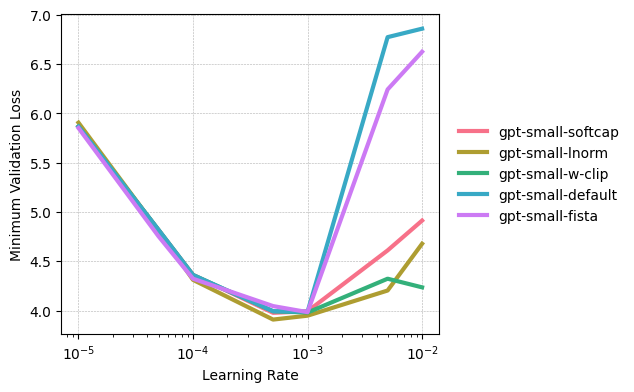

In [37]:
plot_lr_sweep_over_models(df, ycol="min_val_loss")

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Maximum KQ Value'>)

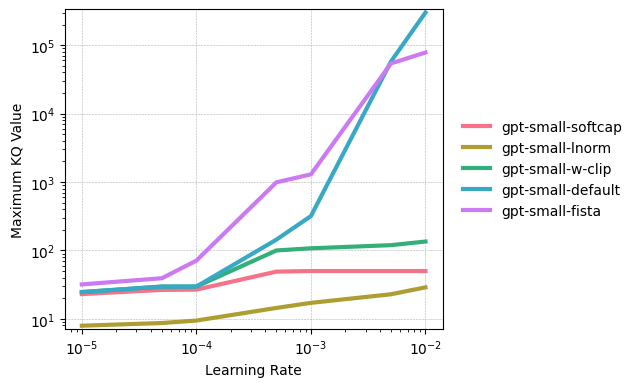

In [38]:
plot_lr_sweep_over_models(df, ycol="kq_max", ylog=True)

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Mean KQ Value'>)

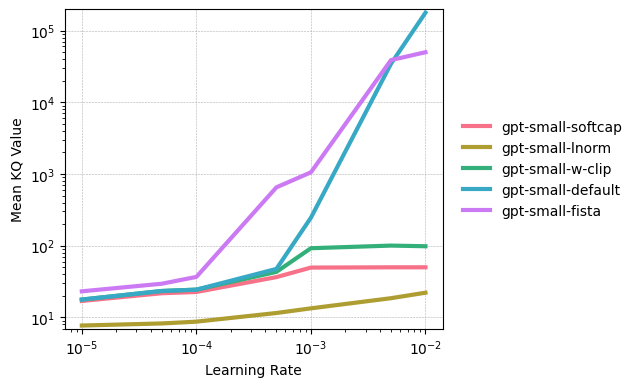

In [39]:
plot_lr_sweep_over_models(df, ycol="kq_mean", ylog=True)

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Median KQ Value'>)

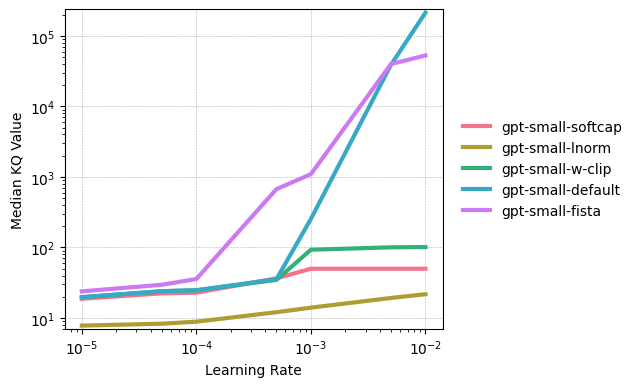

In [40]:
plot_lr_sweep_over_models(df, ycol="kq_median", ylog=True)